<a href="https://colab.research.google.com/github/jjcrofts77/TMB-MATH34041/blob/main/content/notebooks/Chapter0/PythonNetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.3 Introduction to the NetworkX Package

This tutorial will cover the basics of networks, using Python and Networkx, on Jupyter Notebooks. Students are requested to download the [Anaconda distribution](https://docs.anaconda.com/anaconda/install/) of Python (which bundles together many Python libraries and packages) prior to the course beginning. Alternatively, a [Google Colab Notebook](https://colab.research.google.com/notebooks/intro.ipynb) can be used.


## Creating networks
There are three main ways of creating a network in *networkX*:

* Adding nodes and edges manually
* Graph generators
* Reading graphs

### Adding nodes and edges manually
Perhaps the easiest (and most boring!) way to construct a network is to build it from scratch, adding nodes and edges manually.  

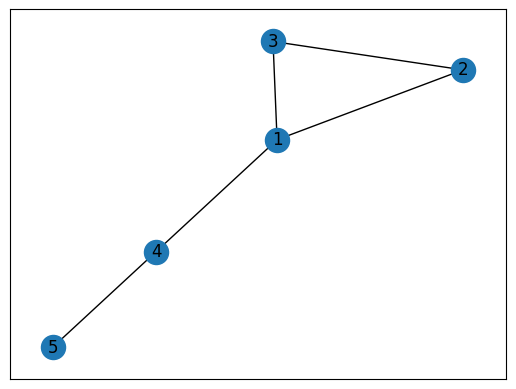

In [189]:
# import packages
import networkx as nx

# building a network from scratch

# define an empty network structure
G = nx.Graph()

# add some nodes
G.add_node("1")
G.add_node("2")
G.add_node("3")
G.add_node("4")
G.add_node("5")

# add some edges
G.add_edge("1","2"), G.add_edge("1","3"), G.add_edge("2","3")
G.add_edge("4","1"),G.add_edge("4","5")

# plot network
nx.draw_networkx(G)
plt.show()

### Graph generators

There are many types of graph generators inside *networkX*. They create predefined network structures, so that you can continue on exploring it and learning more about graph algorithms. Some of the most often used generators are:

* [complete_graph()](https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html)
* [cycle_graph()](https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.cycle_graph.html)
* [star_graph()](https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.star_graph.html)

Not to mention the famous [karate_club_graph()]()!

Below we plot three examples of graphs generated using built-in *networkX* functions.


In [ ]:
# generating networks example

Another famous class of graphs which are of great historical importance to biological networks are the *small-world networks* of Watts and Strogatz which can be called using the [watts_stogatz_graph()](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html) command.

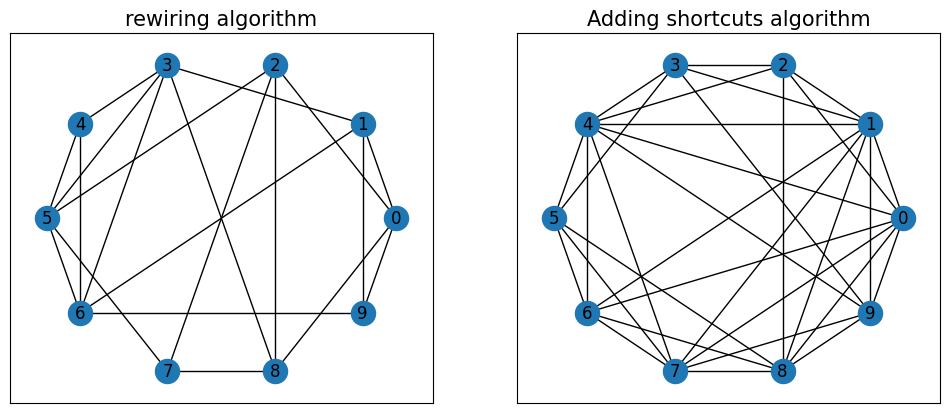

In [176]:
# example of a Watts-Strogatz network
import networkx as nx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2) # our blank canvas (a figure class object)

fig.set_figwidth(12) # set the figure width

# rewiring
G0 = nx.watts_strogatz_graph(n=10,k=4,p=0.5)
pos = nx.circular_layout(G0)

# adding shortcuts
G1 = nx.newman_watts_strogatz_graph(n=10,k=4,p=0.5)
pos = nx.circular_layout(G1)

ax[0].set_title('rewiring algorithm',fontsize=15)
nx.draw_networkx(G0, pos, ax=ax[0])

ax[1].set_title('Adding shortcuts algorithm',fontsize=15)
nx.draw_networkx(G1, pos, ax=ax[1])
plt.show()

As we shall learn as we go through the course, this type of network has the property that it presents both a short average path length and a high level of clustering. A feature of many real-world networks that were poorly captured by network models before the seminal work of [Watts and Strogatz](https://www.nature.com/articles/30918).

### Reading graphs from data
In this course we shall construct networks by reading data files containing the network data. Such data typically comes in one of two forms:

1. Edgelist
2. Adjacency matrix

Data can be imported from many different sources using a variety of formats including: adjacency list, edge list, [GML](https://gephi.org/users/supported-graph-formats/gml-format/), [Pajek](https://gephi.org/users/supported-graph-formats/pajek-net-format/) to name some of the most popular.

An edgelist is a list of source nodes and target nodes that are connected in the network.

They typically come in .csv file (as do adjacency matrices). Below is an example of an edgelist for a small network on 6 nodes

```csv
source, target
1,2
1,3
2,3
1,4
2,4
3,4
1,5
1,6
```

Assuming that the file is saved in the current directory as network.csv then the following code can be used to load the data and plot the network.

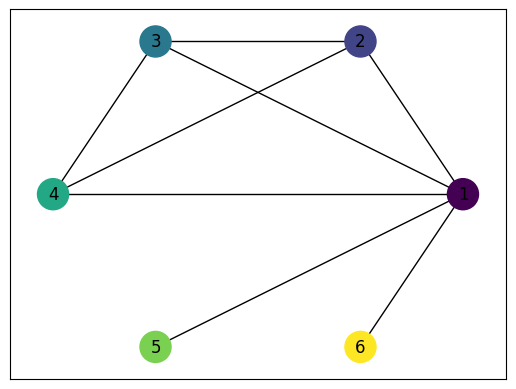

In [188]:
import numpy as np
import networkx as nx
import pandas as pd # the pandas packages is useful for reading in datasets such as csv files and excel spreadsheets

# read in the data and construct a graph object
network_type = nx.Graph()
df = pd.read_csv('network.csv')
G = nx.from_pandas_edgelist(df, create_using=network_type)

# Definenode colors, node layout etc. (see sections below for details)
colors = np.linspace(0, 1, len(G.nodes)) # each node is given a different colour

pos = nx.circular_layout(G) # lay nodes out on a circle

# draw
nx.draw_networkx(G, pos, node_size=500, node_color=colors)
plt.show()

## Drawing basics

In this section we shall provide some additional details on the network plotting capabilities of *networkx*, building on the previous examples.

Drawing of networks in *networkX* is done using either the draw() function or the draw_networkx() function. In this tutorial we shall focus on the draw_networkx() function but almost everything we do would work if we replaced that command with the simpler draw() function.

Let us see how this works in practice.

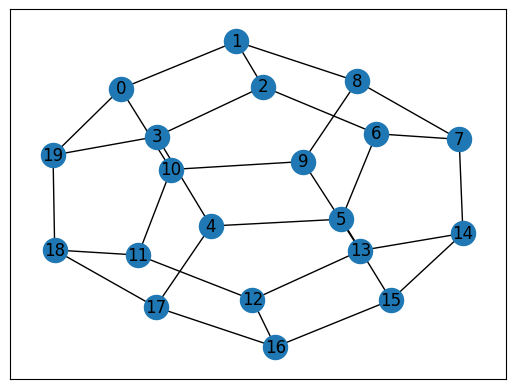

In [187]:
import networkx as nx
import matplotlib.pyplot as plt

# nx.dodecahedral_graph? # uncomment to see what a dodecahedral network is ...

G = nx.dodecahedral_graph() # generate a built-in network
nx.draw_networkx(G) # plot
plt.show()

We can use *network layouts* in order to position the nodes differently. This will make a big difference when trying to visualise large networks later on in the course.

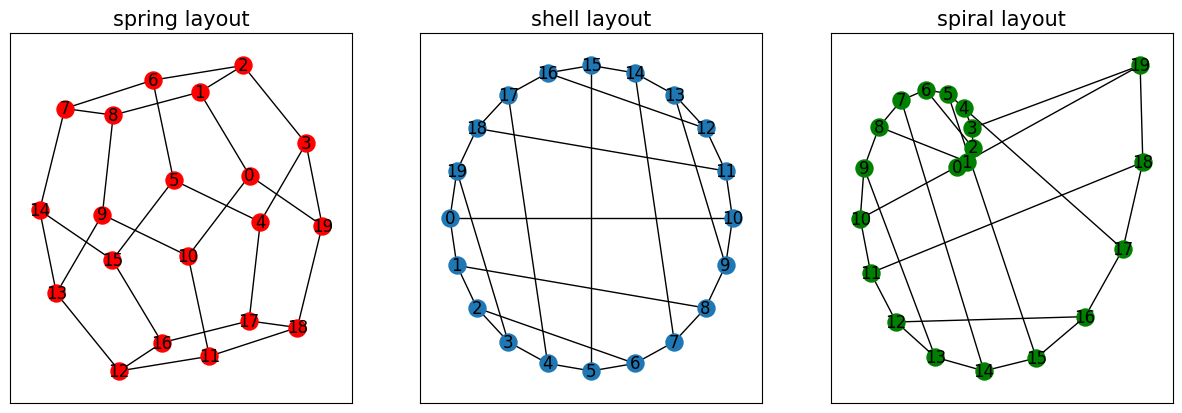

In [160]:
# different node positioning of the dodecahedral network shown above

plt.ion() # view plot

fig, ax = plt.subplots(1,3) # our blank canvas (a figure class object)

fig.set_figwidth(15) # set the figure width

# plot three different layouts

# spring layout
options0 = {"node_size":150,"node_color": "red"} # options for figure 1
nx.draw_networkx(G, pos=nx.spring_layout(G),ax=ax[0],**options0)
ax[0].set_title('spring layout',fontsize=15)

# shell layout
options1 = {"node_size":150} # options for figure 2
nx.draw_networkx(G, pos=nx.shell_layout(G),ax=ax[1],**options1)
ax[1].set_title('shell layout',fontsize=15)

# spiral layout
options2 = {"node_size":150,"node_color": "green"} # options for figure 3
nx.draw_networkx(G, pos=nx.spiral_layout(G),ax=ax[2],**options2)
ax[2].set_title('spiral layout',fontsize=15)

plt.show()

We can also provide node positions as $(x,y)$ coordinates as the following example shows.

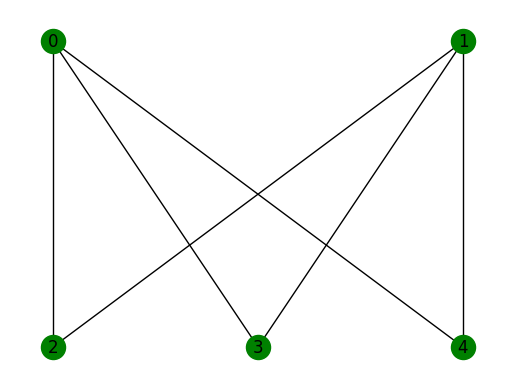

In [191]:
import networkx as nx
import matplotlib.pyplot as plt

# a complete bipartite network on 5 nodes
K23 = nx.complete_bipartite_graph(2, 3)

positions = {0: [-1, 1], 1: [0, 1], 2: [-1, -1], 3: [-0.5, -1], 4: [0, -1]}
ax = plt.figure().gca()
ax.set_axis_off()
options = {"node_size": 300, "node_color": "green"}
nx.draw_networkx(K23, positions, with_labels=True, **options)
plt.show()

Some other drawing options include

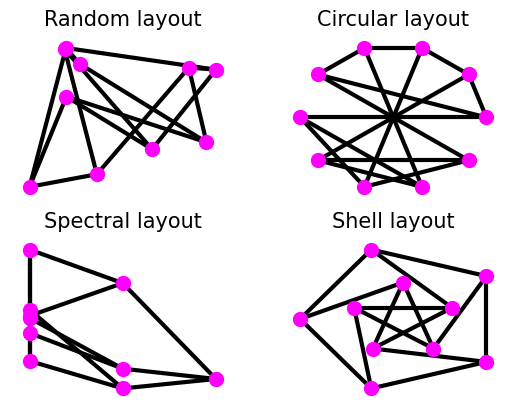

In [201]:
import matplotlib.pyplot as plt
import networkx as nx

options = {
    'node_color': 'magenta',
    'node_size': 100,
    'width': 3,
}

G = nx.petersen_graph() # you might recognise this graph if you've studied the third year graph theory module

ax1 = plt.subplot(221)
ax1.set_title('Random layout',fontsize=15)
nx.draw_random(G, **options)

ax2 = plt.subplot(222)
ax2.set_title('Circular layout',fontsize=15)
nx.draw_circular(G, **options)

ax3 = plt.subplot(223)
ax3.set_title('Spectral layout',fontsize=15)
nx.draw_spectral(G, **options)

ax4 = plt.subplot(224)
ax4.set_title('Shell layout',fontsize=15)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

plt.show()

If you wish to learn more about plotting then see the [draw_networkx()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx) help page.

Note that there are some other really cool visualisation packages in Pytyhon that you might like to look at, for examples see the list below:

* hi

## Functions
[Functions](https://networkx.org/documentation/stable/reference/functions.html) provide an interface to network science methods that can be used to analyse your network data. Below we list some of the most useful ones available in *networkX*.

### Network functions

| Function | Description |
|:--------|:--------|
|[degree(G, nbunch, weight)]()|	Returns a degree view of single node or of nbunch of nodes|
|[degree_histogram(G)]()|	Returns a list of the frequency of each degree value|
|[density(G)]()	|Returns the density of a graph|
|[create_empty_copy(G, with_data)]()|	Returns a copy of the graph G with all of the edges removed|
|[is_directed(G)]()|	Return True if graph is directed|
|[to_directed(graph)]()|	Returns a directed view of the graph graph|
|[to_undirected(graph)]()|	Returns an undirected view of the graph graph|
|[is_empty(G)]()|	Returns True if G has no edges|
|[add_star(G_to_add_to, nodes_for_star, **attr)]()|	Add a star to Graph G_to_add_to|
|[add_path(G_to_add_to, nodes_for_path, **attr)]()|	Add a path to the Graph G_to_add_to|
|[add_cycle(G_to_add_to, nodes_for_cycle, **attr)]()|	Add a cycle to the Graph G_to_add_to|
|[subgraph(G, nbunch)]()|	Returns the subgraph induced on nodes in nbunch|
|[subgraph_view(G, filter_node, filter_edge)]()|	View of G applying a filter on nodes and edges|
|[induced_subgraph(G, nbunch)]()|	Returns a SubGraph view of G showing only nodes in nbunch|
|[restricted_view(G, nodes, edges)]()|	Returns a view of G with hidden nodes and edges|
|[reverse_view(G)]()|	View of G with edge directions reversed|
|[edge_subgraph(G, edges)]()|	Returns a view of the subgraph induced by the specified edges|

### Node functions
The table below provides a description of some of the most common node functions available in networkX.

| Function | Description |
|:--------|:--------|
| [nodes(G)](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.nodes.html#networkx.classes.function.nodes)	| Returns an iterator over the graph nodes|
|[number_of_nodes(G)](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.number_of_nodes.html#networkx.classes.function.number_of_nodes)|	Returns the number of nodes in the graph|
|[neighbors(G, n)](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.neighbors.html#networkx.classes.function.neighbors)	|Returns a list of nodes connected to node n|
|[all_neighbors(graph, node)](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.all_neighbors.html#networkx.classes.function.all_neighbors)	|Returns all of the neighbors of a node in the graph.|
|[common_neighbors(G, u, v)](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.common_neighbors.html#networkx.classes.function.common_neighbors)|Returns the common neighbors of two nodes in a graph|

### Edge functions

The table below provides a description of some of the most common edge functions available in networkX.

| Function | Description |
|:--------|:--------|
|   [edges(G, nbunch)](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.edges.html#networkx.classes.function.edges)  |  Returns an edge view of edges incident to nodes in nbunch|
|  [number_of_edges(G)](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.number_of_edges.html#networkx.classes.function.number_of_edges)   |Returns the number of edges in the graph|
|  [density(G)](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html#networkx.classes.function.density)   |Returns the density of a graph|


Below we explore some of the above functions using the ... network.




In [ ]:
# manipulating networks with functions example



## Linear algebra
One of the most powerful mathematical tools at the network scientists disposal is linear algebra. *NetworkX* has a variety of [linear algebra](https://networkx.org/documentation/stable/reference/linalg.html) tools that can be used to analyse a network.

| Function | Description |
|:--------|:--------|
|[adjacency_matrix(G[, nodelist, dtype, weight])](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html#networkx.linalg.graphmatrix.adjacency_matrix)|Returns adjacency matrix of G|
|[laplacian_matrix(G[, nodelist, weight])](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.laplacianmatrix.laplacian_matrix.html#networkx.linalg.laplacianmatrix.laplacian_matrix)|Returns the Laplacian matrix of G|
|[adjacency_spectrum(G[, weight])](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.spectrum.adjacency_spectrum.html#networkx.linalg.spectrum.adjacency_spectrum)| Returns eigenvalues of the adjacency matrix of G|
|[laplacian_spectrum(G[, weight])](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.spectrum.laplacian_spectrum.html#networkx.linalg.spectrum.laplacian_spectrum)|Returns eigenvalues of the Laplacian of G|
|[algebraic_connectivity(G[, weight, ...])]()|Returns the algebraic connectivity of an undirected graph|
|[fiedler_vector(G[, weight, normalized, tol, ...])]()|Returns the Fiedler vector of a connected undirected graph|
|[spectral_ordering(G[, weight, normalized, ...])]()|Compute the spectral_ordering of a graph|

Below ...

In [ ]:
# spectral properties of a network example

## Common Algorithms

The network measures that we learn about in this course can be obtained using a range of approximations and heuristics, particularly on larger networks. *NetworkX* provides a range of algorithms for computing these measures/statistics some of the most important of which we list below.

### Centrality measures
| Function | Description |
|:--------|:--------|
|[degree_centrality(G)]()|Compute the degree centrality for nodes|
|[eigenvector_centrality(G[, max_iter, tol, ...])]()|Compute the eigenvector centrality for the graph G|
|[katz_centrality(G[, alpha, beta, max_iter, ...])]()|Compute the Katz centrality for the nodes of the graph G|
|[betweenness_centrality(G[, k, normalized, ...])]()|Compute the shortest-path betweenness centrality for nodes|

To use these algorithms we append the function name with the networkx.community tag so as to access the *community* subpackage.

We provide an example below in which we compute a range ofcentrality measures for ... network.

In [ ]:
# centrality measures example

### Communities
Below are some of the most common methods for computing communities in a network.

| Function | Description |
|:--------|:--------|
|[girvan_newman(G, most_valuable_edge=None)](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman)|Finds communities in a graph using the Girvan–Newman method|
|[greedy_modularity_communities(G[, weight, ...])]()|Find communities in G using greedy modularity maximization|
|[naive_greedy_modularity_communities(G[, ...])]()|Find communities in G using greedy modularity maximization|
|[louvain_communities(G[, weight, resolution, ...])]()|Find the best partition of a graph using the Louvain Community Detection Algorithm|
|[louvain_partitions(G[, weight, resolution, ...])]()|Yields partitions for each level of the Louvain Community Detection Algorithm|

To use these algorithms we append the function name with the networkx.community tag so as to access the *community* subpackage.

We provide an example below in which we compute the Newman-Girvan communities for a toy network on 21 nodes.

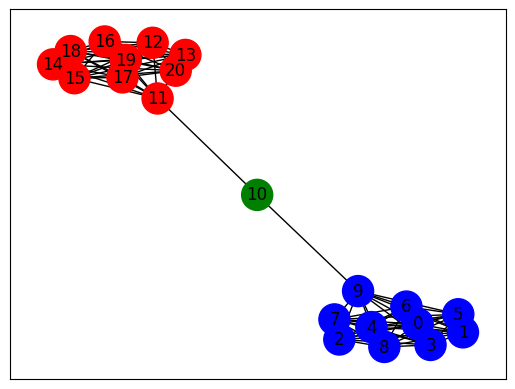

In [161]:
# community detection example

import networkx as nx
G = nx.barbell_graph(10, 1)

comm = nx.community.girvan_newman(G)

# comm is an iterator over tuples of sets of nodes in G.
# Each set of nodes is a community, each tuple is a sequence of communities at
# a particular level of the algorithm.
tuple(sorted(c) for c in next(comm)) # first level
a = tuple(sorted(c) for c in next(comm)) # second level

# define a colormap - since we have three sets (I checked!) three colours suffice
color_map = []
for node in G:
  if node in a[0]:
    color_map.append('blue')
  elif node in a[1]:
    color_map.append('red')
  else:
    color_map.append('green')

# draw network
nx.draw_networkx(G,node_color=color_map,with_labels=True,node_size=500)

This network is called a *bar bell* network for what hopefully are rather obvious reasons! There are clearly three communities as can be seen from the coloured plot, the Newman-Girvan algorithm picks them out perfectly.